In [476]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data preprocessing
  
Reading data

In [477]:
measurements = pd.read_excel("BikeData/BikeCounts.xlsx",sheet_name=[8,9,10,11,12,13,14],index_col=0)
measurements = pd.concat([df for df in measurements.values()],axis = 0)
firstDate = measurements.index[0]

In [478]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61343 entries, 2017-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   02-MI-JAN-N 01.04.2015   61337 non-null  float64
 1   02-MI-JAN-S 01.04.2015   61337 non-null  float64
 2   03-MI-SAN-O 01.06.2015   61308 non-null  float64
 3   03-MI-SAN-W 01.06.2015   61329 non-null  float64
 4   05-FK-OBB-O 01.06.2015   48725 non-null  float64
 5   05-FK-OBB-W 01.06.2015   48677 non-null  float64
 6   06-FK-FRA-O 01.06.2016   61329 non-null  float64
 7   06-FK-FRA-W 01.06.2016   61337 non-null  float64
 8   10-PA-BER-N 01.05.2016   61337 non-null  float64
 9   10-PA-BER-S 01.05.2016   61335 non-null  float64
 10  12-PA-SCH 01.03.2012     61338 non-null  float64
 11  13-CW-PRI 01.04.2015     61337 non-null  float64
 12  15-SP-KLO-N 01.06.2016   61322 non-null  float64
 13  15-SP-KLO-S 01.06.2016   61337 non-null  

In [479]:
def nullThresholding(df:pd.DataFrame,threshold:int):
    columnNames = df.columns
    for col in columnNames:
        if df[col].isna().sum()>threshold:
            df.drop([col],inplace = True,axis = 1)

#Deleting the columns with a lot of null values col 28,29, also those measuring point's values are not dislpayed
measurements.index.name = None
nullThresholding(measurements,10000)

#Remove dates after Id to match column names with other table
columnNames = measurements.columns
newNames = [name.split(" ")[0] for name in columnNames]
mapper = {old:new for (old,new) in zip(columnNames,newNames)}
measurements.rename(columns = mapper,inplace=True)

measurements.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61343 entries, 2017-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   02-MI-JAN-N  61337 non-null  float64
 1   02-MI-JAN-S  61337 non-null  float64
 2   03-MI-SAN-O  61308 non-null  float64
 3   03-MI-SAN-W  61329 non-null  float64
 4   06-FK-FRA-O  61329 non-null  float64
 5   06-FK-FRA-W  61337 non-null  float64
 6   10-PA-BER-N  61337 non-null  float64
 7   10-PA-BER-S  61335 non-null  float64
 8   12-PA-SCH    61338 non-null  float64
 9   13-CW-PRI    61337 non-null  float64
 10  15-SP-KLO-N  61322 non-null  float64
 11  15-SP-KLO-S  61337 non-null  float64
 12  17-SZ-BRE-O  61337 non-null  float64
 13  17-SZ-BRE-W  61336 non-null  float64
 14  18-TS-YOR-O  61326 non-null  float64
 15  18-TS-YOR-W  61337 non-null  float64
 16  19-TS-MON    61309 non-null  float64
 17  20-TS-MAR-N  61337 non-null  float64
 18  20-TS-MAR-S

# Data exploration, visualization

Visualize hourly, daily, and seasonal, and yearly average over time, and geographical 
location.  
  
Compare before, and after covid numbers

Geographical locations of the measuring points

In [480]:
import geopandas as gpd

Look at the monthly changes over time, so I can filter the ones with incomplete data

In [481]:
colNames = measurements.columns

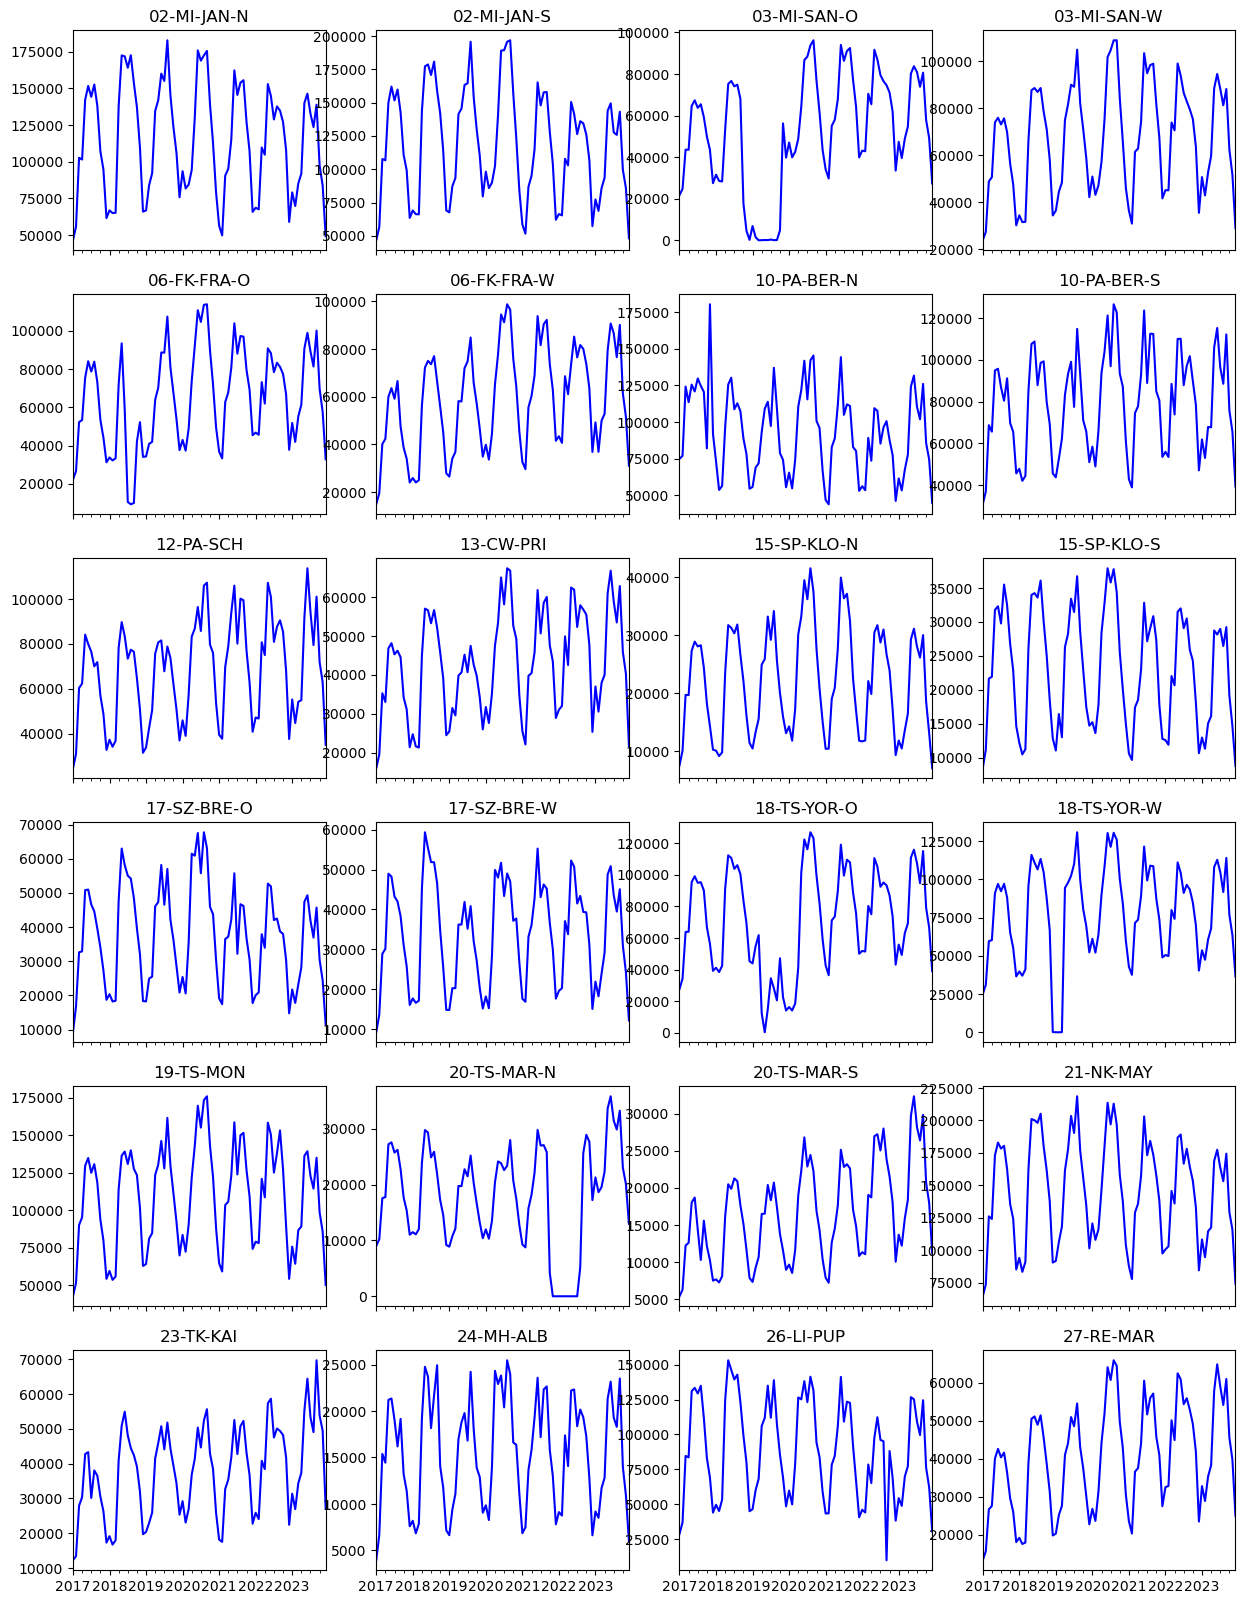

In [482]:
monthlySum = measurements.groupby(pd.PeriodIndex(measurements.index, freq="M")).sum()
axes = monthlySum.plot(subplots = True,figsize = (15,20),layout=(6,4),legend = False, color = "blue")
for c,title in enumerate(monthlySum.columns):
    x = c//axes.shape[1]
    y = c%axes.shape[1]
    axes[x,y].set_title(title)

In [483]:
dailySum = measurements.groupby(pd.PeriodIndex(measurements.index,freq = "D")).sum()

#Averages of a particular time period
meanMonthly=monthlySum.groupby(monthlySum.index.month).mean()
meanHourly=measurements.groupby(measurements.index.hour).mean()
meanDayOfWeek=dailySum.groupby(dailySum.index.dayofweek).mean()

In [484]:
meanDays = measurements.groupby(pd.PeriodIndex(measurements.index,freq="D")).sum()

Average hourly counts every hour of the measurement points since their installation

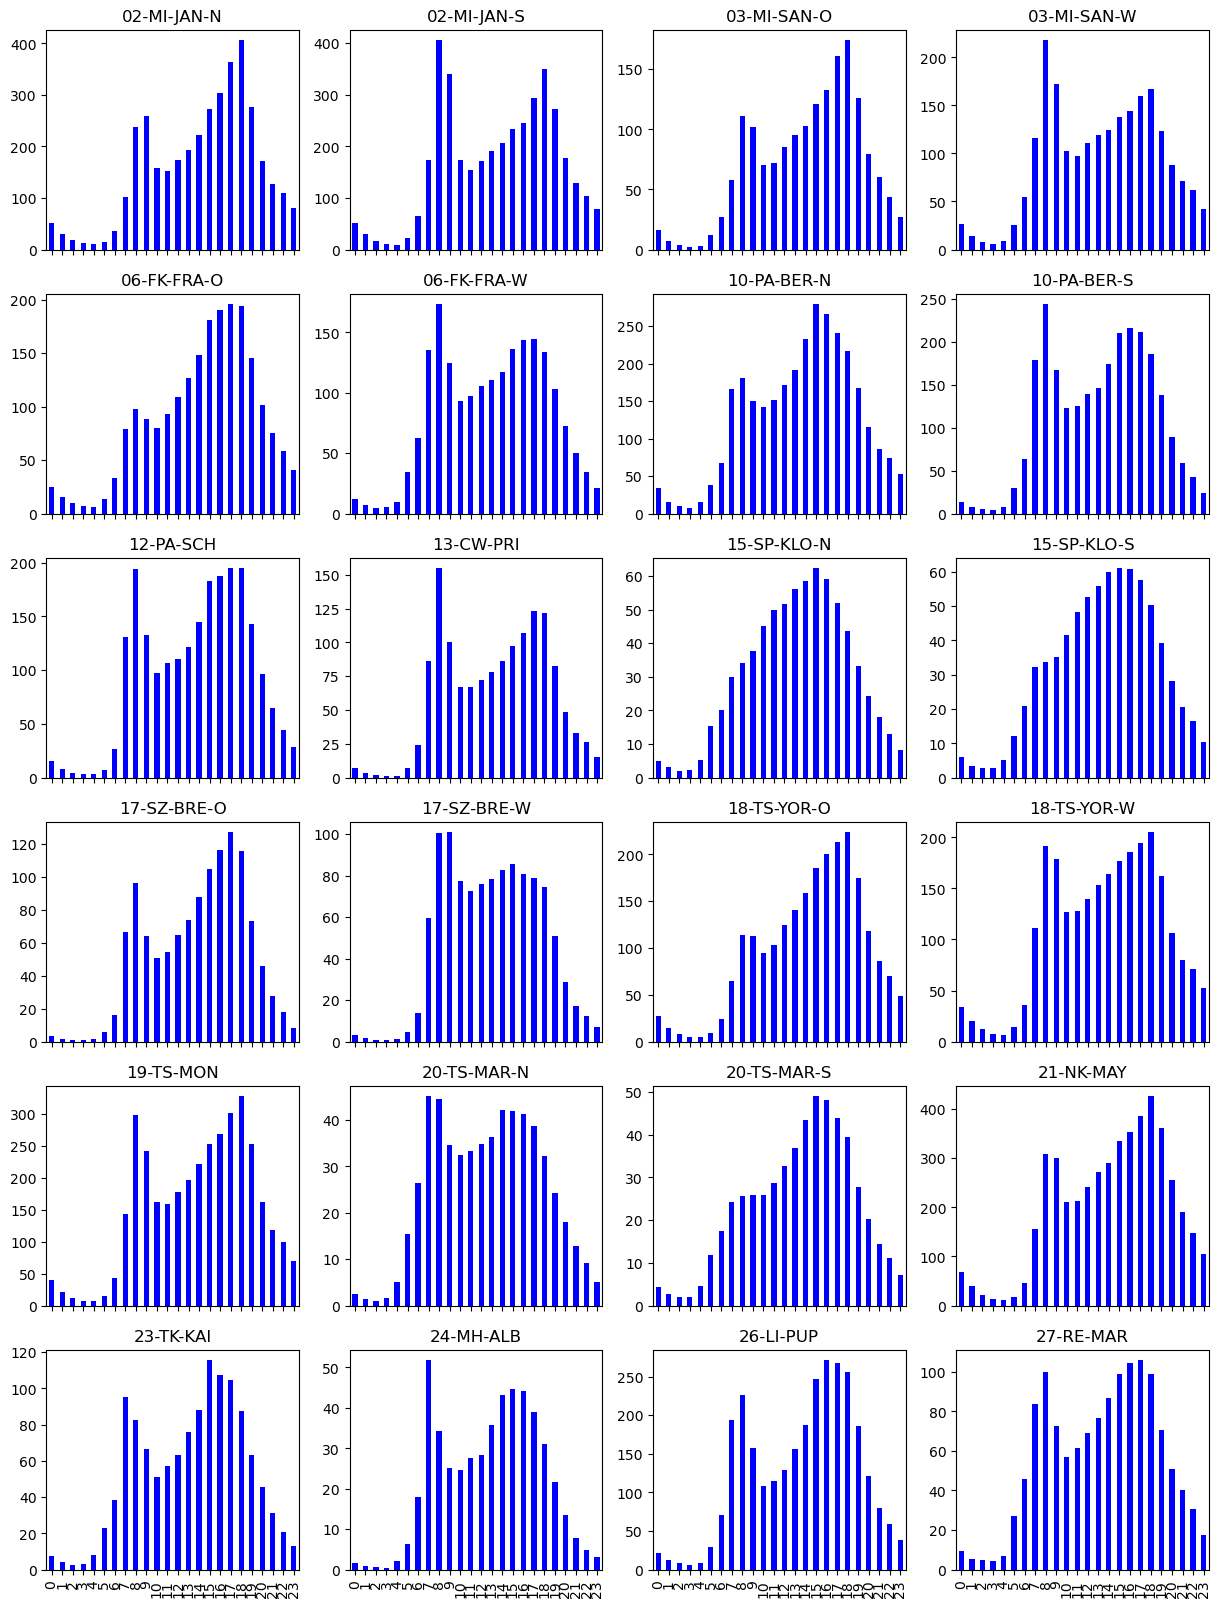

In [485]:
axes = meanHourly.plot(kind = "bar",subplots = True,figsize = (15,20),layout=(6,4),legend = False,color = "blue")

Average counts of each month of each measuring points since their installation

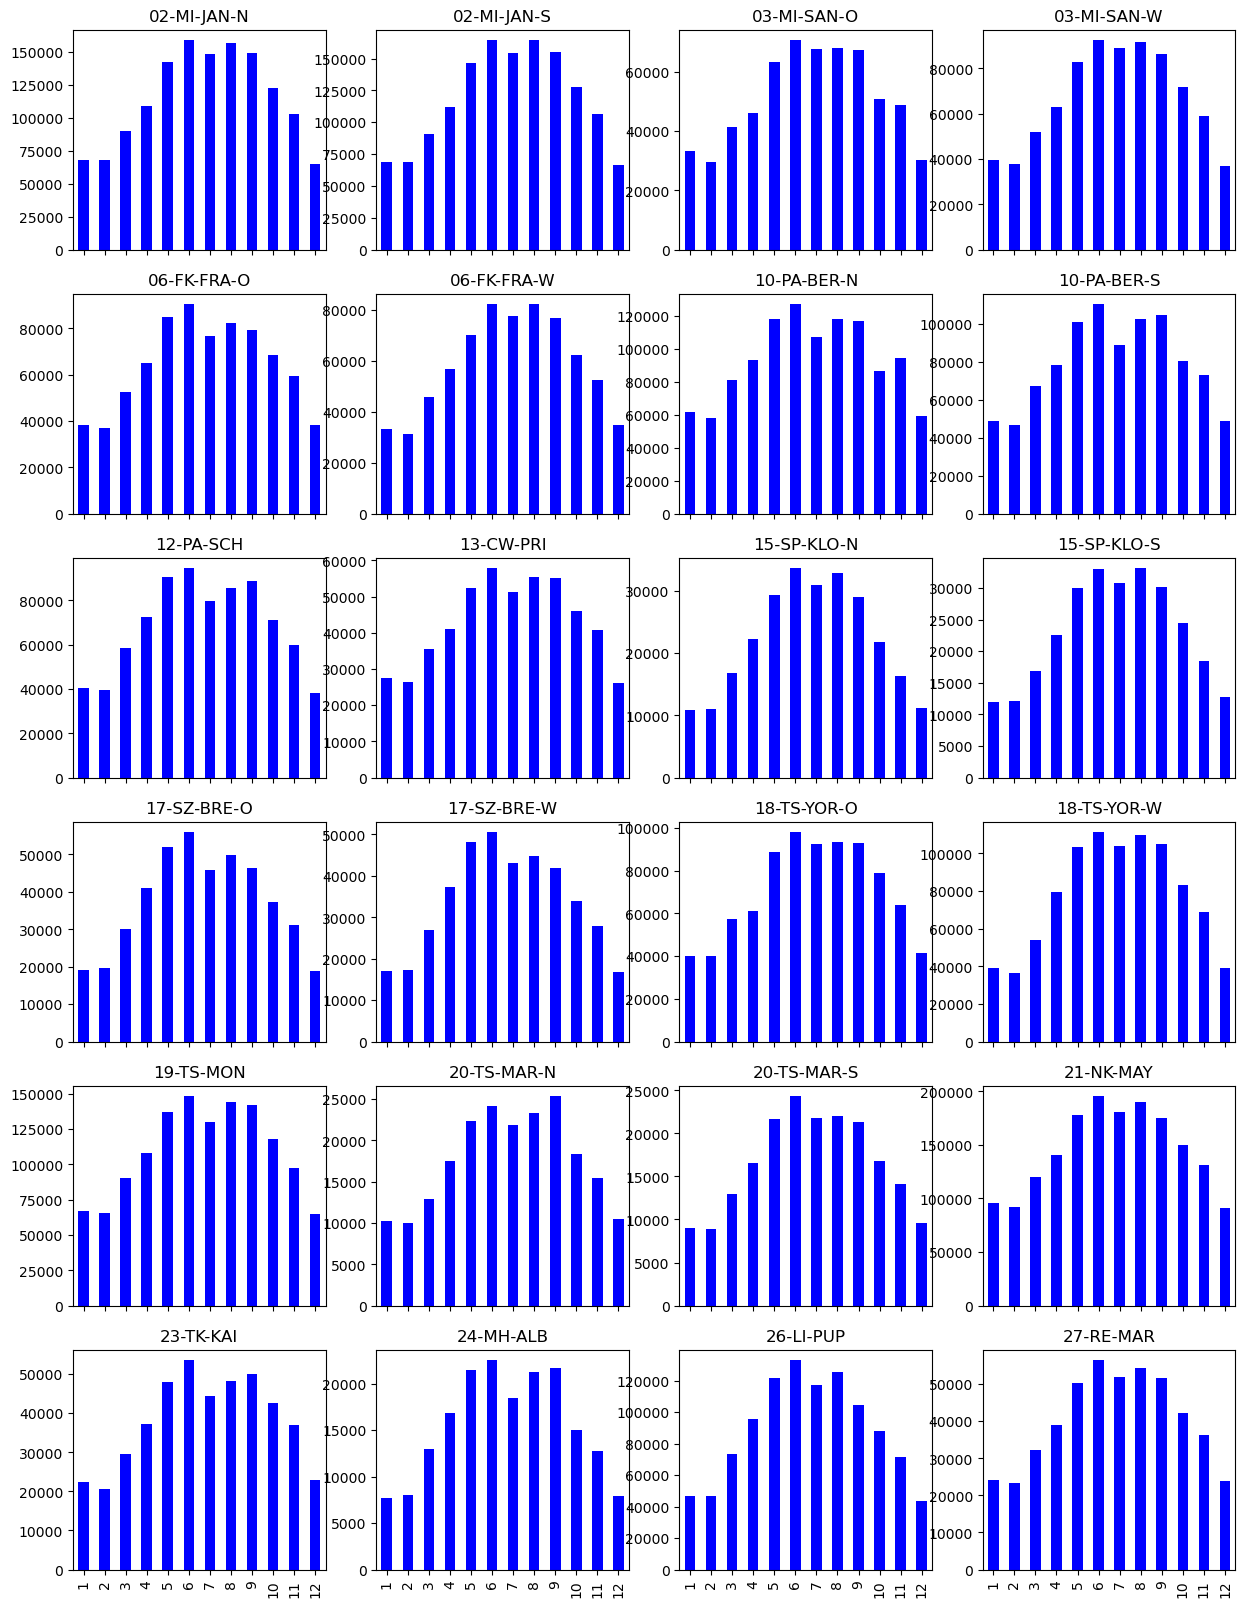

In [486]:
axes = meanMonthly.plot(kind = "bar",subplots = True,figsize = (15,20),layout=(6,4),legend = False,color = "blue")

Average counts on the days of the week of each measuring points since their installation

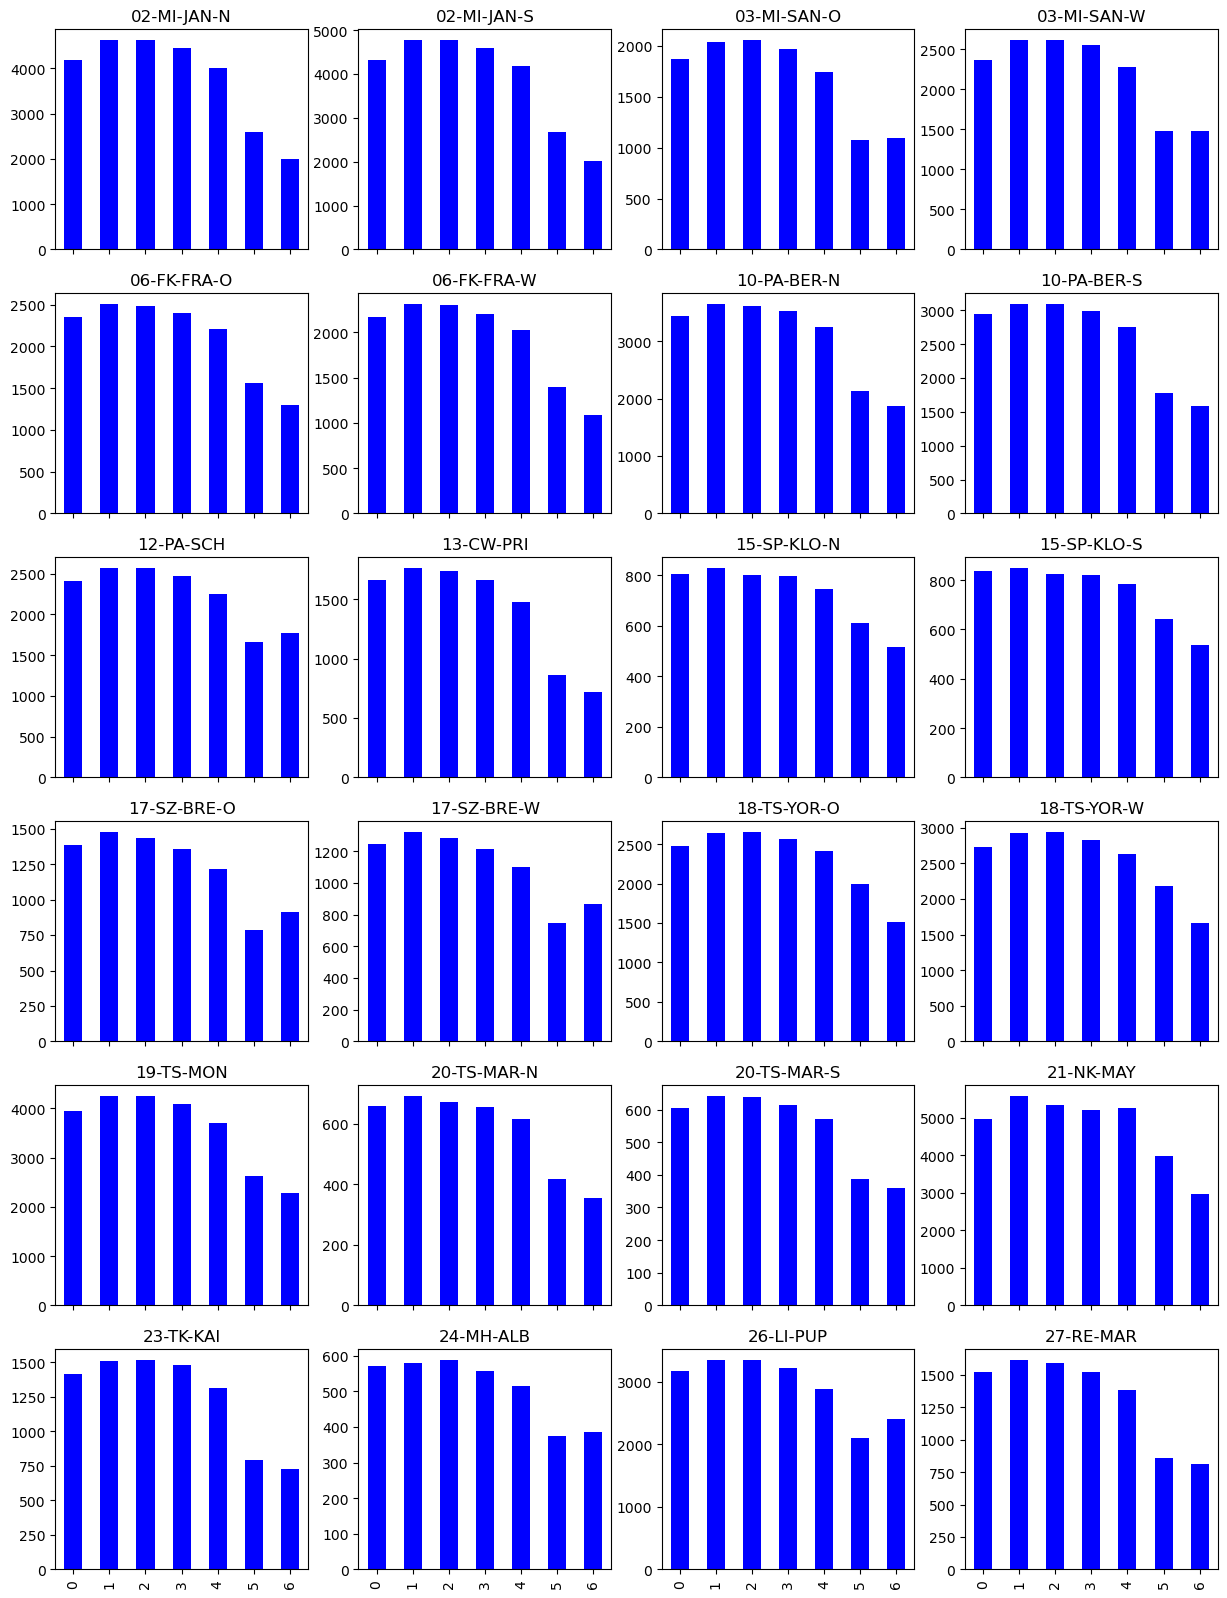

In [487]:
axes =meanDayOfWeek.plot(kind = "bar",subplots = True,figsize = (15,20),layout=(6,4),legend = False,color = "blue")

Locations of the measurment points

In [488]:
#Plot geo data
#Reading geo data
berlin_data = gpd.read_file("GeographicalData/Berlin.geojson")
berlin_roads = gpd.read_file("GeographicalData/BerlinRoadNetwork.geojson")
berlin_main_roads = berlin_roads[(berlin_roads["strassenkl"] == "II") | (berlin_roads["strassenkl"]=="I")]

#Add weekly average to measure points
measureStationLocations = pd.read_excel("BikeData/BikeCounts.xlsx",sheet_name=[2])[2]
#Tanslate column names
measureStationLocations.rename(columns={"Zählstelle": "Measure station","Beschreibung - Fahrtrichtung":"Direction of travel","Breitengrad":"Latitude","Längengrad":"Longtitude","Installationsdatum":"Installation date"},inplace= True)
measureStationLocations.replace({'17-SK-BRE-O':'17-SZ-BRE-O', '17-SK-BRE-W':'17-SZ-BRE-W'},inplace=True)
measureStationLocations = measureStationLocations[measureStationLocations["Measure station"].isin(measurements.columns)].reset_index()

weeklySum = measurements.groupby(pd.PeriodIndex(measurements.index,freq = "Y")).sum()
weeklyMean = weeklySum.mean()
measureStationLocations.insert(1,"Weekly average",weeklyMean.values)

c:\Users\hgand\anaconda3\envs\ComputerBase\Lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


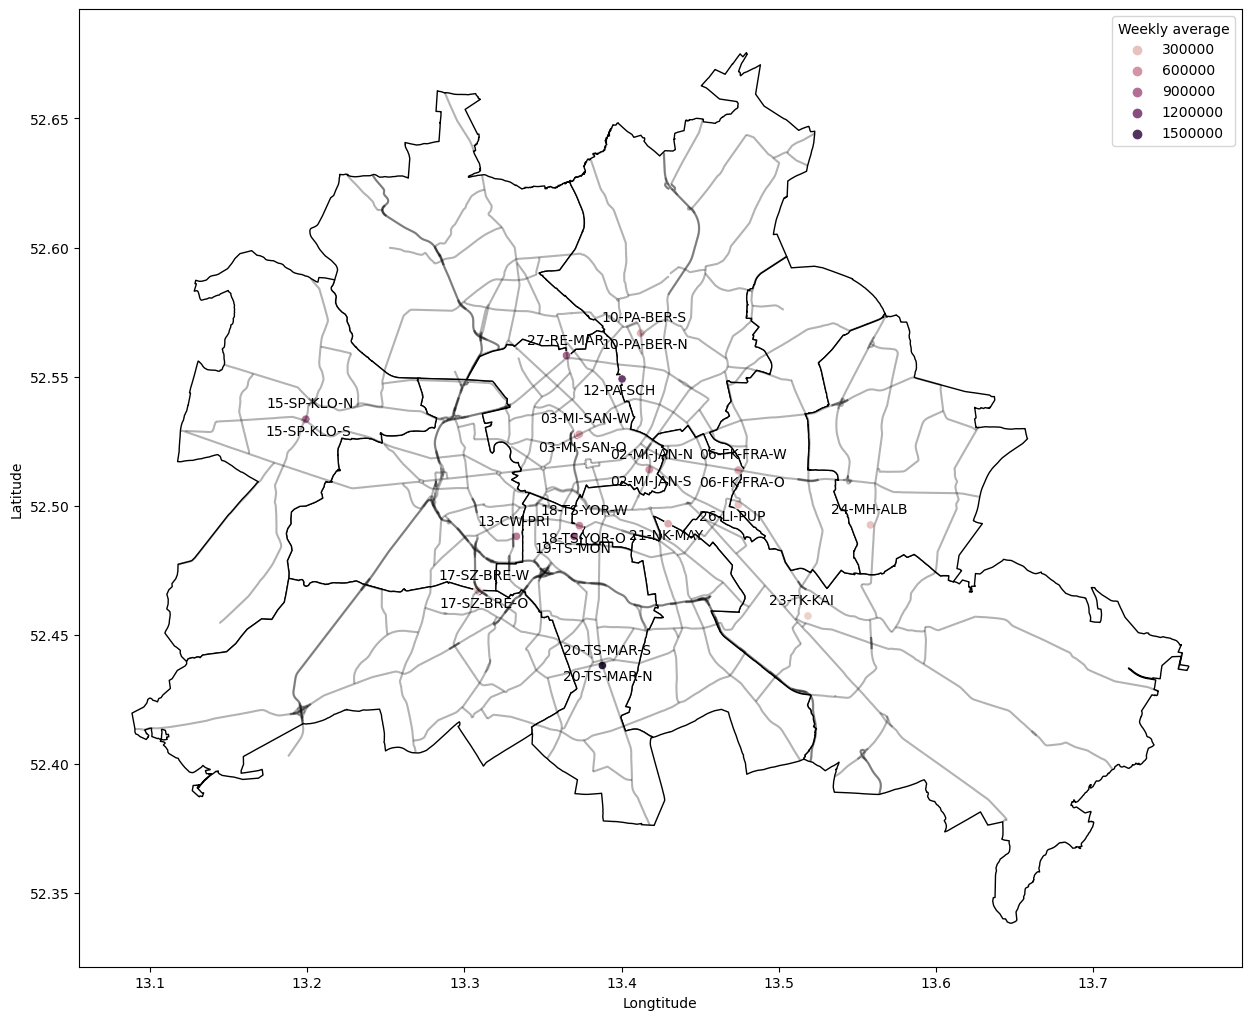

In [489]:
fig,axs = plt.subplots(figsize=(15,20))

berlin_data.plot(ax = axs,color = "white", edgecolor = "black")
berlin_main_roads.plot(ax = axs,color = "black",alpha = 0.3)
sns.scatterplot(ax = axs,data=measureStationLocations, x="Longtitude", y="Latitude", hue = "Weekly average",alpha = 1)

for i, txt in enumerate(measureStationLocations["Measure station"]):
    x,y = measureStationLocations["Longtitude"][i], measureStationLocations["Latitude"][i]
    if i%2 == 0:
        axs.annotate(txt, (x,y),xytext= (x-0.025,y-0.006))
    else:
        axs.annotate(txt, (x,y),xytext= (x-0.025,y+0.0045))


### The most south point is the one leading to the airport

# Data patterns
From the above plots, we can conclude that all of the average data are following the same trend. This means that it is enough to use only one of the measurement points's data, or we can sum them up, assuming that ont biker did not cross 2 different measuring point, which is a right assumption given the geogrpahical spread of the checkpoints. TODO: maybe do a X2 test to see if they are actually independent, but maybe it cant be done so take a look. 
  
It can also be seen from the plots, that the number of daily bikers depend heavily on the season, so the data will be split based on seasons or months, and will be examined separately.  

#### 1. Prove that it is better to view monthly or seasonal data, since it has less deviation then looking at the whole year. First I calculate the standard deviations of the daily counts, looking at a year, month, and weekly periods. Then these values are averaged, which can be done by a simple mean operation, since all of the measure points have the same number of records.  
  
Some of the years contain a lot of values that are not real, and not plausible. For accurate data description, I decided to take a look at the year 2020.

<Axes: >

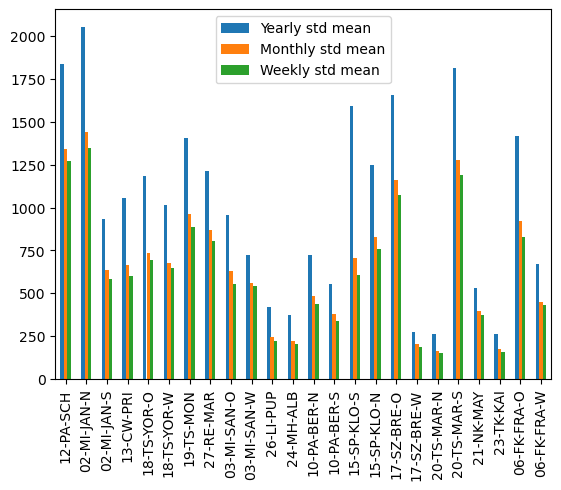

In [490]:
y2020 = dailySum[dailySum.index.year==2020]

meanStdYearly = y2020.groupby(y2020.index.year).std().mean()
meanStdMonthly = y2020.groupby(pd.PeriodIndex(y2020.index,freq = "M")).std().mean()
meanStdWeekly = y2020.groupby(pd.PeriodIndex(y2020.index,freq = "W")).std().mean()

meanStds = pd.DataFrame({"Yearly std mean": meanStdYearly.values, "Monthly std mean": meanStdMonthly.values,"Weekly std mean":meanStdWeekly.values},index = measureStationLocations["Measure station"].values)
meanStds.plot.bar()

As it can be seen from the above plot, the monthly and weekly mean standard deviations are  substantially lower compared to the yearly deviations. I am going to use monthly period to find outliers, because the weekly would be too fine graine. Using a lower standard deviation data helps to identify outliers much better over a yearly period, because if the std is large, it means that the quantiles are also more spread out. For example the details like a rainy summer day would be left out, because of the values obtained during winter. 
  
The high standard deviation values can happen, bacause the machines can fail, and the data contains multiple measurements that are marked as not accurate. Unfortunately these are replaced with 0. The problem with this, is that they cannot be distinguished from other measurements where the number was actually 0, and the values cannot be replaced by Nans. TODO: Look at sequences of 0s, and if there are a lot after each other, switch them to Nans

#### 2. Find outlier days of each month by looking at the quntiles. The data is grouped by months.  
  
I decided to further examine 2 of the measuring points based on the above measurements.  
- 02-MI-JAN: This is located quite close to the city centre, where events might take place, with traffic restrictions. Also its weekly average is one of the lowest, however it has one of the highest average standard deviations.
- 20-TS-MAR: This chackpoint is located on a road which leads to the airport. Also we need to mention that to one direction it has a large mean standard deviation, but much lower to the other direction.
  


In [491]:
"""
Takes a datafrme, and a groupby method, which means what period the outliers should be found for.

Returns a dict, that where each entry is a 2D list of outliers for each month
"""
def findOutliers(df:pd.DataFrame, groupbyMethod)->dict:
    outliers = {k:None for k in df.columns}
    grouped = df.groupby(groupbyMethod)
    Q1 = grouped.quantile(0.25)
    Q3 = grouped.quantile(0.75)
    iqr = Q3-Q1
    lowerBound = Q1 - 1.5*iqr
    upperBound = Q3 + 1.5*iqr
    lowerBound = lowerBound.resample("1d").ffill()
    upperBound = upperBound.resample("1d").ffill()
    for col in df.columns:
        outliers[col] = df[col][(df[col] < lowerBound[col]) | (df[col]>upperBound[col])]
    return outliers

usedStations = ["02-MI-JAN-N", "02-MI-JAN-S","20-TS-MAR-N","20-TS-MAR-S"]
dailySumReduced2020 = y2020[usedStations]
measurementsReduced = measurements[usedStations]

outliers = findOutliers(dailySumReduced2020,pd.PeriodIndex(dailySumReduced2020.index,freq = "M"))
outliers

C:\Users\hgand\AppData\Local\Temp\ipykernel_12140\1585279636.py:14: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  lowerBound = lowerBound.resample("1d").ffill()
C:\Users\hgand\AppData\Local\Temp\ipykernel_12140\1585279636.py:15: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  upperBound = upperBound.resample("1d").ffill()


{'02-MI-JAN-N': Series([], Freq: D, Name: 02-MI-JAN-N, dtype: float64),
 '02-MI-JAN-S': Series([], Freq: D, Name: 02-MI-JAN-S, dtype: float64),
 '20-TS-MAR-N': 2020-03-29     95.0
 2020-04-13    259.0
 Freq: D, Name: 20-TS-MAR-N, dtype: float64,
 '20-TS-MAR-S': 2020-03-29    114.0
 2020-04-13    241.0
 Freq: D, Name: 20-TS-MAR-S, dtype: float64}

The outlies on 2020-03-29 was on Good Friday a national holiday in Germany. For the other I did not find a reason based only on real life events, maybe examining other factors will help.

3. Looking at the weather data, try to find out what happened at the days of the outliers

In [492]:
def readWeatherData(path,colNames,index_col):
    df = pd.read_csv(path,delimiter="\s+|;\s*",parse_dates=True,date_format="%Y%m%d%H",usecols= colNames,index_col=index_col)
    df.index.name=None
    df = df.groupby(df.index).last() #Skipping duplicates
    return df

In [493]:
rainData = readWeatherData("Weather/berlin_precipitation.csv",["MESS_DATUM","R1","RS_IND"],"MESS_DATUM")
windData = readWeatherData("Weather/berlin_wind.csv",["MESS_DATUM","F","D"],"MESS_DATUM")
temperatureData = readWeatherData("Weather/berlin_temperature.csv",["MESS_DATUM","TT_TU","RF_TU"],"MESS_DATUM")
sunData = readWeatherData("Weather/berlin_sun.csv",["MESS_DATUM","SD_SO"],"MESS_DATUM")

rainData = rainData[(rainData.index >= "2020-01-01") & (rainData.index < "2021-01-01")]
windData = windData[(windData.index >= "2020-01-01") & (windData.index < "2021-01-01")]
temperatureData = temperatureData[(temperatureData.index >= "2020-01-01") & (temperatureData.index < "2021-01-01")]
sunData = sunData[(sunData.index >= "2020-01-01") & (sunData.index < "2021-01-01")]

#Create a wether dataframe with the relevant values
#weatherData = pd.concat([temperatureData["TT_TU"],temperatureData["RF_TU"],windData["F"],windData["D"],rainData["R1"],rainData["RS_IND"]]
#                        ,axis = 1
#                        ,keys=["Temperature","Humidity","Wind_speed", "Wind_direction","Precipitation","Precipitation_indicator"])

weatherData = pd.concat([temperatureData,rainData,windData,sunData],axis = 1)
weatherData = weatherData.rename(columns = {"R1":"Precipitation","RS_IND":"Precipitation_indicator","F":"Wind_speed","D":"Wind_direction",
                    "TT_TU":"Temperature","RF_TU":"Humidity","SD_SO":"Hourly sunshine"})
#Handling missing values
weatherData.replace(-999,np.NaN,inplace=True)
weatherData["Hourly sunshine"] = weatherData["Hourly sunshine"].fillna(0)

weatherData.tail()

C:\Users\hgand\AppData\Local\Temp\ipykernel_12140\4133407124.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path,delimiter="\s+|;\s*",parse_dates=True,date_format="%Y%m%d%H",usecols= colNames,index_col=index_col)
C:\Users\hgand\AppData\Local\Temp\ipykernel_12140\4133407124.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path,delimiter="\s+|;\s*",parse_dates=True,date_format="%Y%m%d%H",usecols= colNames,index_col=index_col)
C:\Users\hgand\AppData\Local\Temp\ipykernel_12140\4133407124.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine

,Temperature,Humidity,Precipitation,Precipitation_indicator,Wind_speed,Wind_direction,Hourly sunshine
2020-12-31 19:00:00,2.6,75.0,0.0,0,3.1,150.0,0.0
2020-12-31 20:00:00,2.3,76.0,0.0,0,2.8,160.0,0.0
2020-12-31 21:00:00,2.1,78.0,0.0,0,2.2,160.0,0.0
2020-12-31 22:00:00,2.1,80.0,0.0,1,2.0,160.0,0.0
2020-12-31 23:00:00,2.3,81.0,0.0,1,1.5,170.0,0.0


In [494]:
measurementsReduced = measurements[usedStations]
measurementsReduced2020 = measurementsReduced[(measurementsReduced.index >= "2020-01-01")&(measurementsReduced.index<"2021-01-01")]
sumOfCounts = measurementsReduced2020[measurementsReduced2020.columns[:4]].mean(axis = 1)
measurementsReduced2020.insert(4,"Summed counts",sumOfCounts)

measurementsWeather = pd.concat([measurementsReduced2020,weatherData],axis = 1)

#In order to get more accurate results, I group the data by days, and calculate the appropriate values for each column
meanCols = ["Temperature","Humidity","Wind_speed","Hourly sunshine"]
maxCols = ["Precipitation_indicator"]
sumCols = ["02-MI-JAN-N","02-MI-JAN-S","20-TS-MAR-N","20-TS-MAR-S","Precipitation"]

mMean = measurementsWeather[meanCols]
mMax = measurementsWeather[maxCols]
mSum = measurementsWeather[sumCols]

mMean = mMean.groupby(pd.PeriodIndex(mMean.index,freq = "D")).mean()
mMax = mMax.groupby(pd.PeriodIndex(mMax.index,freq = "D")).max()
mSum = mSum.groupby(pd.PeriodIndex(mSum.index,freq = "D")).sum()


countsWeatherDaily = pd.concat([mSum,mMean],axis = 1)
countsWeatherDaily.head()

,02-MI-JAN-N,02-MI-JAN-S,20-TS-MAR-N,20-TS-MAR-S,Precipitation,Temperature,Humidity,Wind_speed,Hourly sunshine
2020-01-01,579.0,603.0,103.0,114.0,0.0,2.733333,87.750000,2.512500,3.833333
2020-01-02,1948.0,2088.0,313.0,274.0,0.0,0.875000,76.291667,1.712500,15.583333
2020-01-03,1827.0,1903.0,291.0,286.0,4.3,4.641667,88.375000,4.237500,0.000000
2020-01-04,947.0,1051.0,160.0,118.0,5.7,4.150000,85.416667,6.329167,0.000000
2020-01-05,1127.0,1128.0,158.0,153.0,0.0,1.845833,84.500000,3.145833,4.125000


<Axes: >

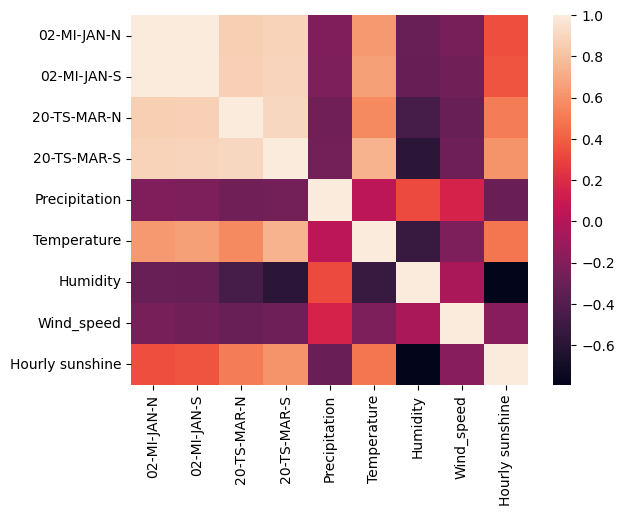

In [495]:
#Correlation matrix
corrMatrix = countsWeatherDaily.corr()
sns.heatmap(corrMatrix)

In [496]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output = False)
enc.fit(countsWeatherDaily.index.dayofweek.values.reshape((-1,1)))
out = enc.transform(countsWeatherDaily.index.dayofweek.values.reshape((-1,1)))
onehotDays = pd.DataFrame(out,index = countsWeatherDaily.index)
countsWeatherDaily = pd.concat([countsWeatherDaily,onehotDays],axis = 1)
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
countsWeatherDaily.rename(columns = {k:v for (k,v) in zip(range(7),days)},inplace = True)
countsWeatherDaily.head()

,02-MI-JAN-N,02-MI-JAN-S,20-TS-MAR-N,20-TS-MAR-S,Precipitation,Temperature,Humidity,Wind_speed,Hourly sunshine,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2020-01-01,579.0,603.0,103.0,114.0,0.0,2.733333,87.750000,2.512500,3.833333,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-01-02,1948.0,2088.0,313.0,274.0,0.0,0.875000,76.291667,1.712500,15.583333,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-03,1827.0,1903.0,291.0,286.0,4.3,4.641667,88.375000,4.237500,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-01-04,947.0,1051.0,160.0,118.0,5.7,4.150000,85.416667,6.329167,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-01-05,1127.0,1128.0,158.0,153.0,0.0,1.845833,84.500000,3.145833,4.125000,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Hourly sunshine correlates the most with the data, next is temperature. However these two phenomena usually come together, so I will mostly examine the temperature. Another important note is that humidity negatively correlates with the number of cyclists.

4. Do a grouping on the overall data, and try to understand the groups

c:\Users\hgand\anaconda3\envs\ComputerBase\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\hgand\anaconda3\envs\ComputerBase\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\hgand\anaconda3\envs\ComputerBase\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\hgand\anaconda3\envs\ComputerBase\Lib\site-packages\sklearn\cluster\_kmea

,Precipitation,Temperature,Humidity,Wind_speed,Hourly sunshine,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2020-01-01,0.0,2.733333,87.750000,2.512500,3.833333,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.875000,76.291667,1.712500,15.583333,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-03,4.3,4.641667,88.375000,4.237500,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-01-04,5.7,4.150000,85.416667,6.329167,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-01-05,0.0,1.845833,84.500000,3.145833,4.125000,0.0,0.0,0.0,0.0,0.0,0.0,1.0


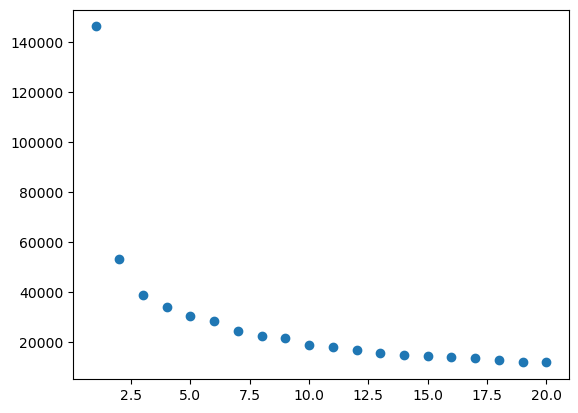

In [497]:
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

#Preprocessing of the data for clustering. First the Nan values are removed, second, since the counts are going to be described, 
#we cant keep all 4 measure station's counts in the table, so I am summing them.(With this I am assuming that no cyclists cross the same point 
# twice)
#imputer = KNNImputer(n_neighbors = 4, weights = "uniform")
#measurementsWeatherRaw = imputer.fit_transform(countsWeatherDaily)
#sumData = measurementsWeatherRaw[:,4:]

countsWeatherDaily1 = countsWeatherDaily[countsWeatherDaily.columns[4:]]

#Determine the best number of clusters
def fit(data,numCentroids):
    km = KMeans(n_clusters= numCentroids)
    km.fit(data)
    return km.inertia_

centroidsErrors = []
maxCentroids = 20
for C in range(1,maxCentroids+1):
    centroidsErrors.append(fit(countsWeatherDaily1,C))

plt.scatter(np.arange(1,maxCentroids+1),centroidsErrors)
countsWeatherDaily1.head()

I would use around 4 clusters, as more inertia is less mostly because there are more centroids, which will obviously reduce the distance. Next I will find the most important features, and visualize the clusters based on them.


c:\Users\hgand\anaconda3\envs\ComputerBase\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\hgand\anaconda3\envs\ComputerBase\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[215 151]


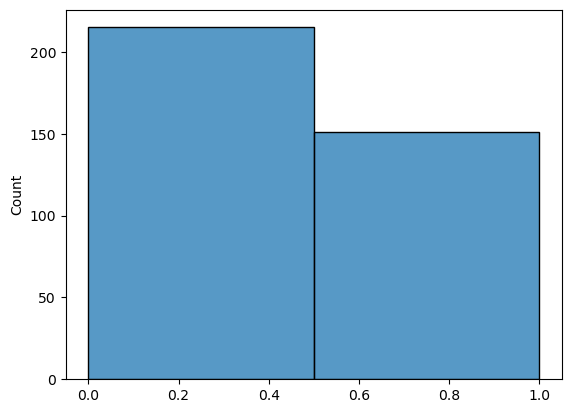

In [498]:
numClusters = 2
km = KMeans(n_clusters= numClusters)
km.fit(countsWeatherDaily1)
#Find the size of each group
groups,counts = np.unique(km.labels_,return_counts = True)
sns.histplot(km.labels_,bins = numClusters)
print(counts)

<Axes: xlabel='PC1', ylabel='PC2'>

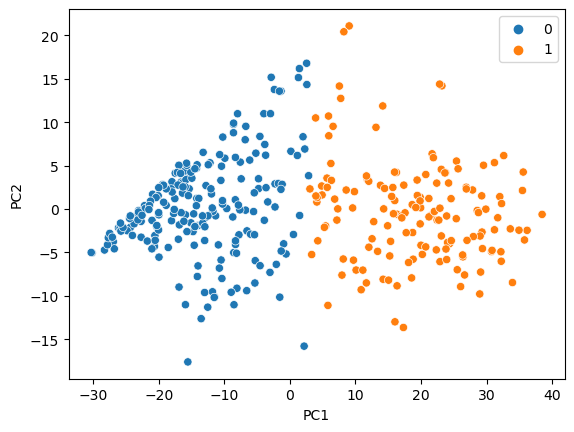

In [499]:
#Visualizing the clusters using PCA. I am keeping 4 dimensions, because 1., 3 features had a high correlation with the number of 
#cyclists (temperature,humidity, and sunshine), and it is still quite easy to visualize separately.
from sklearn.decomposition import PCA

pca = PCA(2)
transformed_data = pca.fit_transform(countsWeatherDaily1)

pca_data = pd.DataFrame(transformed_data,columns=['PC1','PC2']) 
hue = pd.Categorical(km.labels_)
sns.scatterplot(x="PC1",y="PC2",hue=hue,data=pca_data)

The clusters are tightly placed around each other, and no outlier is found. My guess based on this, is that the clusters are based on the seasons of the year, as the weather changes tho most according to them. So next I will visualize the entries of the table by time, temperature, humidity, and average hourly sunshine per day, and marking the cluster it belongs to with a color.

<Axes: ylabel='Hourly sunshine'>

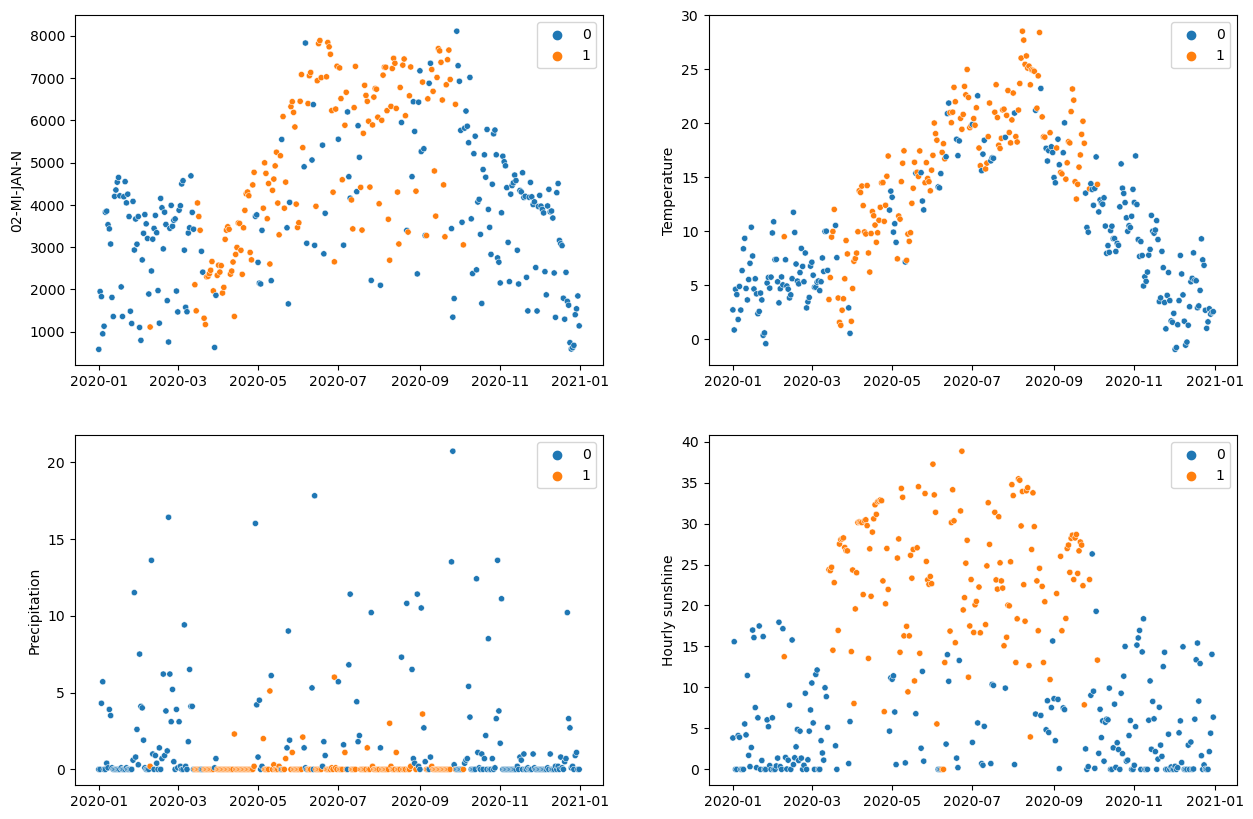

In [500]:
fig, axs = plt.subplots(2,2,figsize = (15,10))

sns.scatterplot(s = 20,ax = axs[0,0],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "02-MI-JAN-N",hue =  hue)
sns.scatterplot(s = 20,ax = axs[0,1],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "Temperature",hue =  hue)
sns.scatterplot(s = 20,ax = axs[1,0],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "Precipitation",hue =  hue)
sns.scatterplot(s = 20,ax = axs[1,1],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "Hourly sunshine",hue =  hue)

This classification does not seem to be correct. The reason for that, is the data has multiple underlying patterns, like a day, a week, and a month. So for better results, I will group the data daily, and calculate the average, then do the clustering.

In [513]:

dfNormed 

,Precipitation,Temperature,Humidity,Wind_speed,Hourly sunshine,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2020-01-01,-0.422519,-1.324851,1.181188,-0.825137,-0.779657,-0.406390,-0.406390,1.0,0.0,0.0,0.0,0.0
2020-01-02,-0.422519,-1.598557,0.400606,-1.490973,0.262470,-0.406390,-0.406390,0.0,1.0,0.0,0.0,0.0
2020-01-03,0.966288,-1.043780,1.223765,0.610572,-1.119641,-0.406390,-0.406390,0.0,0.0,1.0,0.0,0.0
2020-01-04,1.418458,-1.116195,1.022233,2.351457,-1.119641,-0.406390,-0.406390,0.0,0.0,0.0,1.0,0.0
2020-01-05,-0.422519,-1.455567,0.959787,-0.298017,-0.753788,-0.406390,-0.406390,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,-0.422519,-1.488093,-0.558801,2.008135,-1.119641,-0.406390,-0.406390,0.0,0.0,0.0,0.0,1.0
2020-12-28,-0.131839,-1.309508,0.394929,0.149342,-0.927476,2.453969,-0.406390,0.0,0.0,0.0,0.0,0.0
2020-12-29,-0.067243,-1.383152,1.192542,-0.658678,-0.727920,-0.406390,2.453969,0.0,0.0,0.0,0.0,0.0
2020-12-30,-0.422519,-1.356149,0.795155,-0.665614,0.125737,-0.406390,-0.406390,1.0,0.0,0.0,0.0,0.0


c:\Users\hgand\anaconda3\envs\ComputerBase\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: ylabel='Hourly sunshine'>

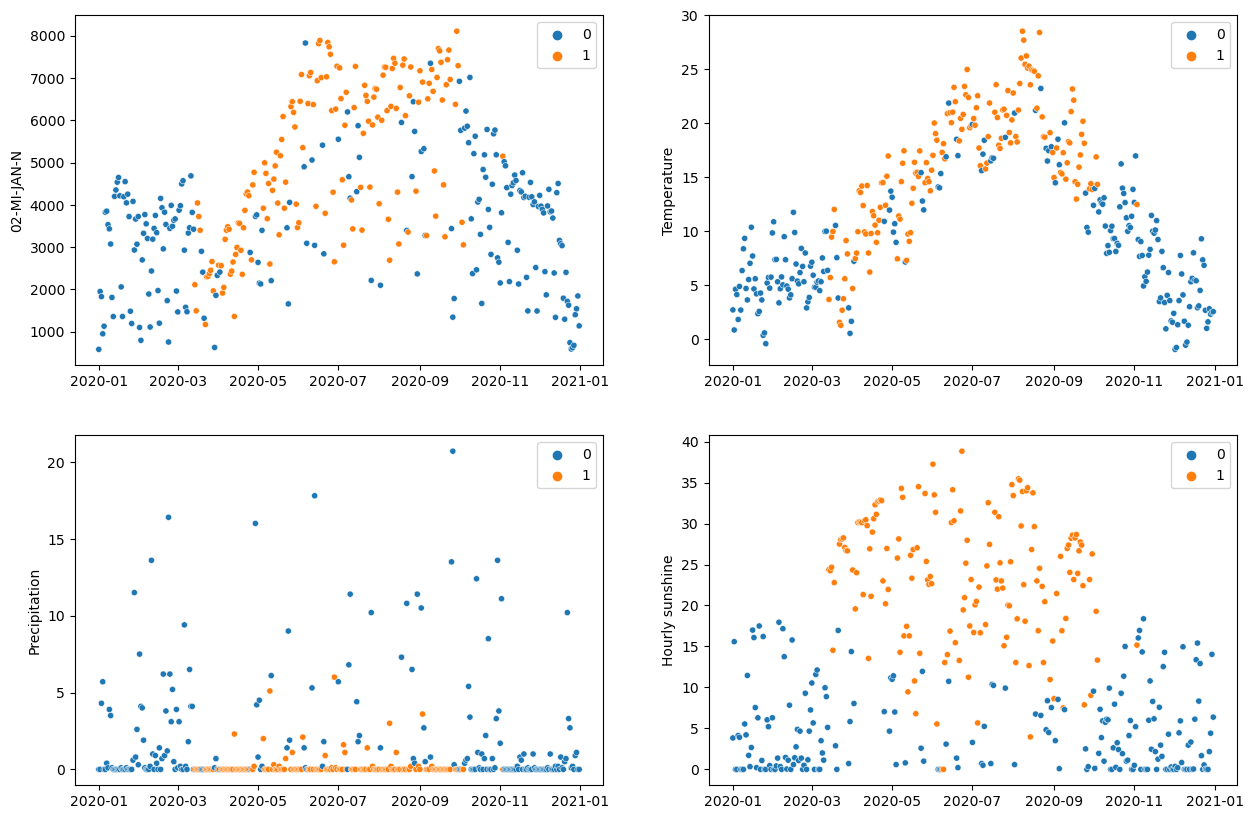

In [501]:
#Try on normalized data
a = countsWeatherDaily1[countsWeatherDaily1.columns[:7]]
a = (a-a.mean())/a.std()
b = countsWeatherDaily1[countsWeatherDaily1.columns[7:]]
dfNormed = pd.concat([a,b],axis = 1)
kmNormed = KMeans(n_clusters = numClusters)
kmNormed.fit(dfNormed)

fig, axs = plt.subplots(2,2,figsize = (15,10))
hueNormed = pd.Categorical(kmNormed.labels_)

sns.scatterplot(s = 20,ax = axs[0,0],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "02-MI-JAN-N",hue =  hueNormed)
sns.scatterplot(s = 20,ax = axs[0,1],data = countsWeatherDaily,  x = countsWeatherDaily.index.to_timestamp(), y = "Temperature",hue =  hueNormed)
sns.scatterplot(s = 20,ax = axs[1,0],data = countsWeatherDaily,  x = countsWeatherDaily.index.to_timestamp(), y = "Precipitation",hue =  hueNormed)
sns.scatterplot(s = 20,ax = axs[1,1],data = countsWeatherDaily,  x = countsWeatherDaily.index.to_timestamp(), y = "Hourly sunshine",hue =  hueNormed)

Next I will try to do hierarchical clusterin on the data

<Axes: ylabel='Hourly sunshine'>

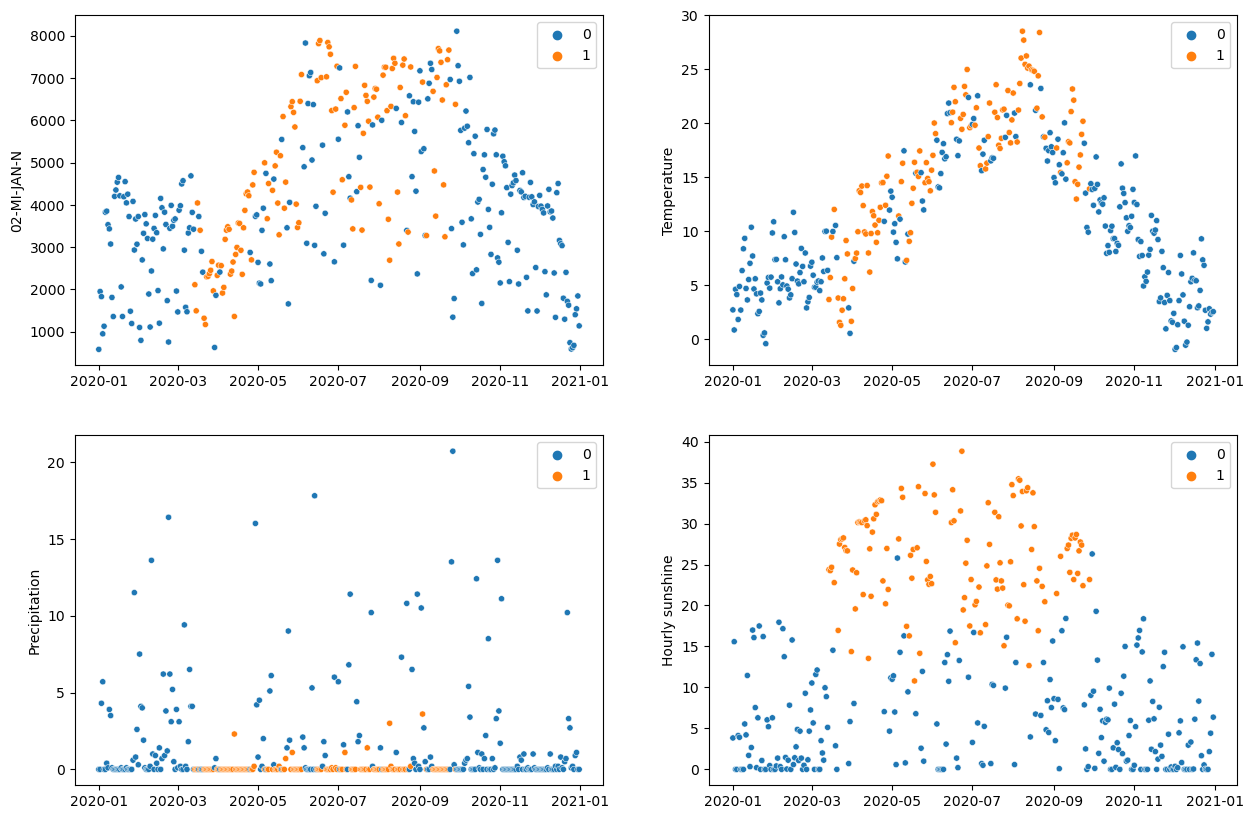

In [502]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

clustering = AgglomerativeClustering(n_clusters = numClusters,linkage = "ward").fit(countsWeatherDaily1)
hueAgg = pd.Categorical(clustering.labels_)

fig, axs = plt.subplots(2,2,figsize = (15,10))
sns.scatterplot(s = 20,ax = axs[0,0],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "02-MI-JAN-N",hue =  hueAgg)
sns.scatterplot(s = 20,ax = axs[0,1],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "Temperature",hue =  hueAgg)
sns.scatterplot(s = 20,ax = axs[1,0],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "Precipitation",hue =  hueAgg)
sns.scatterplot(s = 20,ax = axs[1,1],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "Hourly sunshine",hue =  hueAgg)

<Axes: ylabel='Hourly sunshine'>

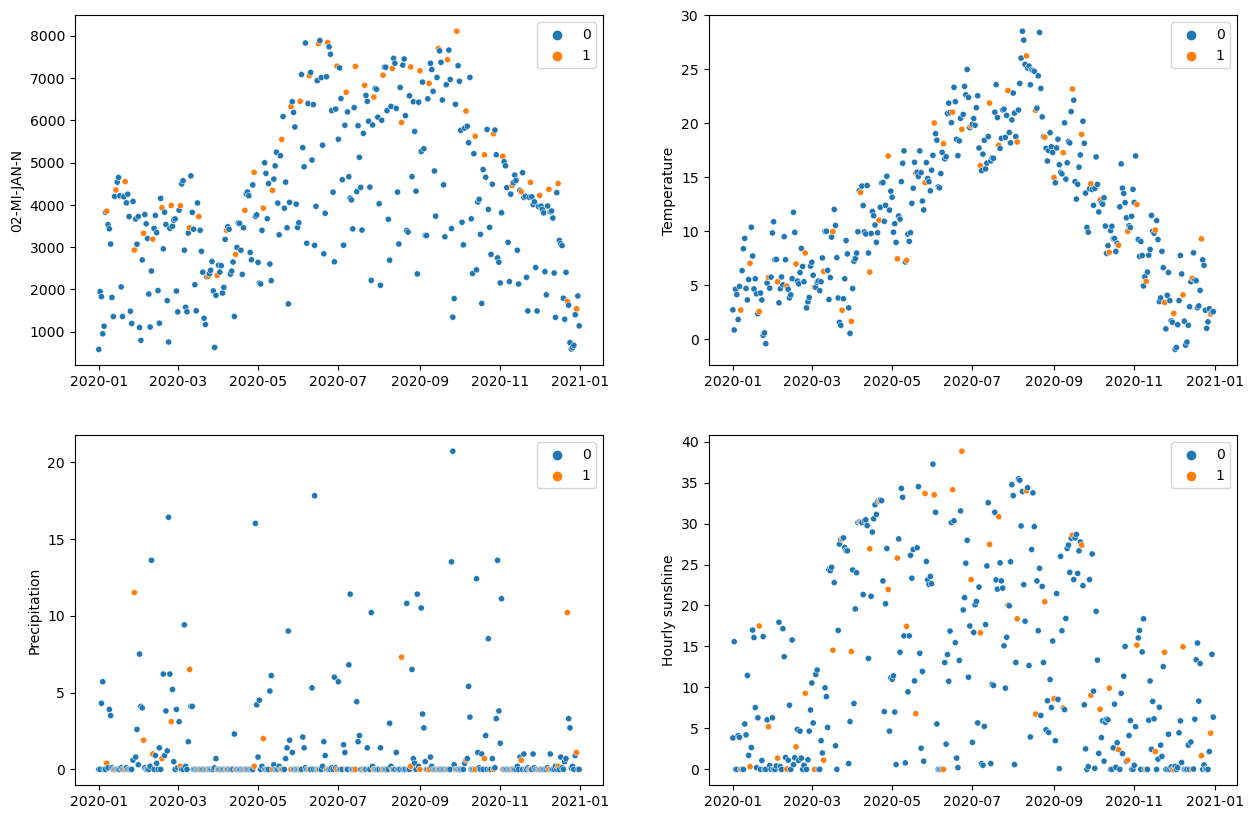

In [503]:
clustering = AgglomerativeClustering(n_clusters = numClusters).fit(dfNormed)

fig, axs = plt.subplots(2,2,figsize = (15,10))
hueAgg = pd.Categorical(clustering.labels_)

sns.scatterplot(s = 20,ax = axs[0,0],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "02-MI-JAN-N",hue = hueAgg)
sns.scatterplot(s = 20,ax = axs[0,1],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "Temperature",hue =  hueAgg)
sns.scatterplot(s = 20,ax = axs[1,0],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "Precipitation",hue =  hueAgg)
sns.scatterplot(s = 20,ax = axs[1,1],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "Hourly sunshine",hue =  hueAgg)


As one last thing, I would like to compare the classes based on the measurment point. There must be a difference, since one leads to the airport, and one is in the city centre.

<Axes: ylabel='20-TS-MAR-N'>

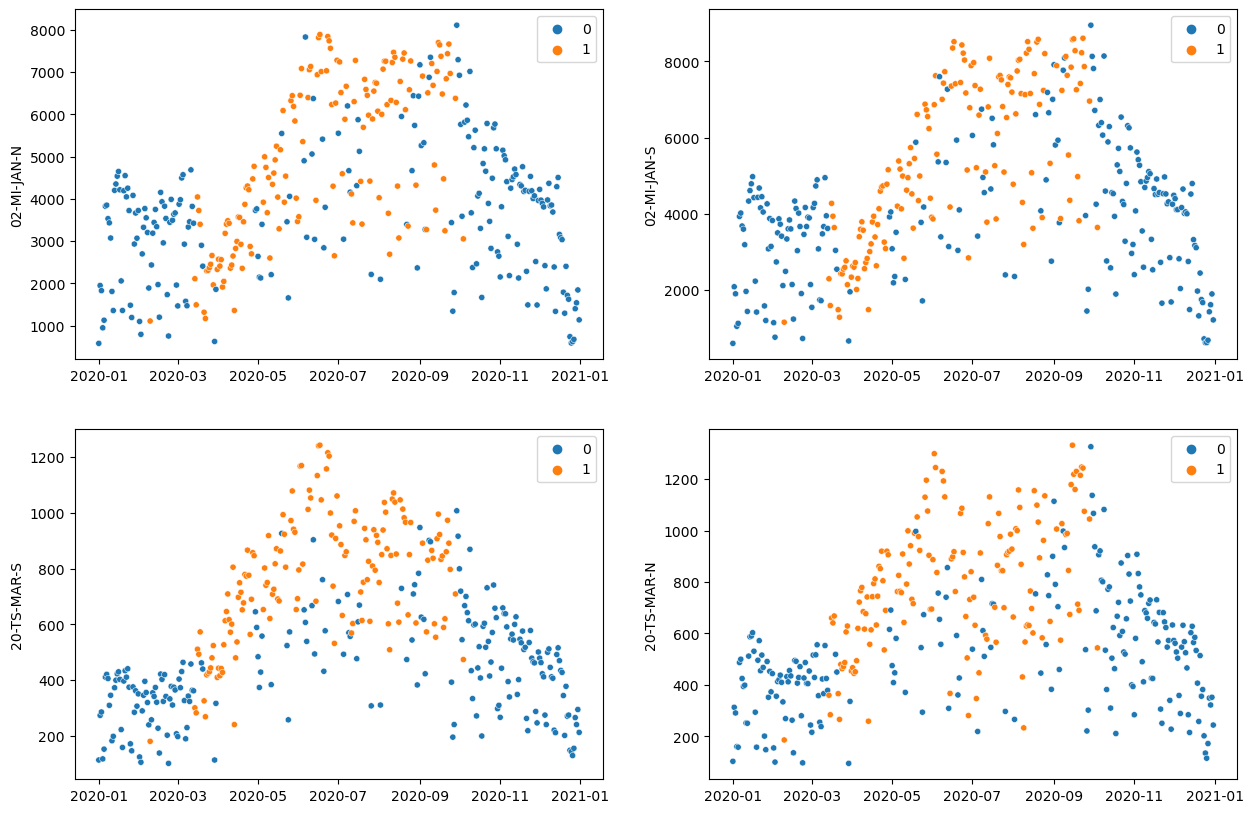

In [504]:
fig, axs = plt.subplots(2,2,figsize = (15,10))

sns.scatterplot(s = 20,ax = axs[0,0],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "02-MI-JAN-N",hue =  hue)
sns.scatterplot(s = 20,ax = axs[0,1],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "02-MI-JAN-S",hue =  hue)
sns.scatterplot(s = 20,ax = axs[1,0],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "20-TS-MAR-S",hue =  hue)
sns.scatterplot(s = 20,ax = axs[1,1],data = countsWeatherDaily, x = countsWeatherDaily.index.to_timestamp(), y = "20-TS-MAR-N",hue =  hue)

In [505]:
#The average counts based on the classes in the time period of group 1
y2020Labeled = y2020
y2020Labeled["Labels"] = hue

#Find first and last occurence of 
group1 = y2020Labeled[y2020Labeled["Labels"]==0]
first = group1.index[0]
last = group1.index[-1]

labelReduced = y2020Labeled[(y2020Labeled.index < last) & (y2020Labeled.index > first)]

labelGroups = labelReduced.groupby("Labels").mean()
labelGroups.loc[0]/labelGroups.loc[1]

C:\Users\hgand\AppData\Local\Temp\ipykernel_12140\3438933907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y2020Labeled["Labels"] = hue
C:\Users\hgand\AppData\Local\Temp\ipykernel_12140\3438933907.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  labelGroups = labelReduced.groupby("Labels").mean()


02-MI-JAN-N    0.729406
02-MI-JAN-S    0.714328
03-MI-SAN-O    0.727695
03-MI-SAN-W    0.682785
06-FK-FRA-O    0.638618
06-FK-FRA-W    0.645057
10-PA-BER-N    0.656239
10-PA-BER-S    0.667923
12-PA-SCH      0.653624
13-CW-PRI      0.684253
15-SP-KLO-N    0.538739
15-SP-KLO-S    0.570309
17-SZ-BRE-O    0.541701
17-SZ-BRE-W    0.554277
18-TS-YOR-O    0.610983
18-TS-YOR-W    0.653506
19-TS-MON      0.690810
20-TS-MAR-N    0.640362
20-TS-MAR-S    0.568769
21-NK-MAY      0.711149
23-TK-KAI      0.714652
24-MH-ALB      0.558787
26-LI-PUP      0.553724
27-RE-MAR      0.643525
dtype: float64

One general observation is that there are more blue classes towards colder months, and the orange class on average has about 1.5 times higher cyclist counts than the blue. This means
  
Based on the agglomerative clustering, I decided to divide the data into 2 classes, one represents the days when people would hop on a bike, and the others when they wouldnt because of the bad weather.

5. Make a decision tree whether to go biking or not given the current weather

In [506]:
from sklearn.tree import DecisionTreeClassifier

countsWeatherDaily.head()
#Add the classes to the tree

,02-MI-JAN-N,02-MI-JAN-S,20-TS-MAR-N,20-TS-MAR-S,Precipitation,Temperature,Humidity,Wind_speed,Hourly sunshine,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2020-01-01,579.0,603.0,103.0,114.0,0.0,2.733333,87.750000,2.512500,3.833333,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-01-02,1948.0,2088.0,313.0,274.0,0.0,0.875000,76.291667,1.712500,15.583333,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-03,1827.0,1903.0,291.0,286.0,4.3,4.641667,88.375000,4.237500,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-01-04,947.0,1051.0,160.0,118.0,5.7,4.150000,85.416667,6.329167,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-01-05,1127.0,1128.0,158.0,153.0,0.0,1.845833,84.500000,3.145833,4.125000,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Correspondences between cycling and weather (and later other) attributes
Correlation with weather, and if possible geograpgical, and traffic data


0. Try to find the attribute that effects going by bycicle the most

1. Do a linear regression based on the number of cyclsts, and the best attribute